<a href="https://colab.research.google.com/github/JSravanreddy/ML-projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is supervisedlearning model we will trian them with tha labeled data

we will be determining the price the house so it is regression,it contains the 14 features.We need to do


dataprocessing --data we will sutable to train


data analysis--to find the interrelation between the data


split the data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

import the dataset

In [ ]:
housedata=sklearn.datasets.load_boston()
print(housedata)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#load the dataset to into pandas dataframe
data=pd.DataFrame(housedata.data,columns=housedata.feature_names)
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


we also include the target coloum to the data

In [ ]:
data["target"]=housedata.target
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]


In [ ]:
data.shape

(506, 14)

we have 506 rows and 16 colomns
check for the misiing vallues

In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [ ]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




now we will find the correlation between thw freatues
basically they are two types:
correlation =relation between two features
1.positive correlation if one values increses then other values also increses
2.Negative correlation if one values increases then other decreses



In [ ]:
corr=data.corr()

             CRIM        ZN     INDUS  ...         B     LSTAT    target
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

heatmap are very useful to find correlation

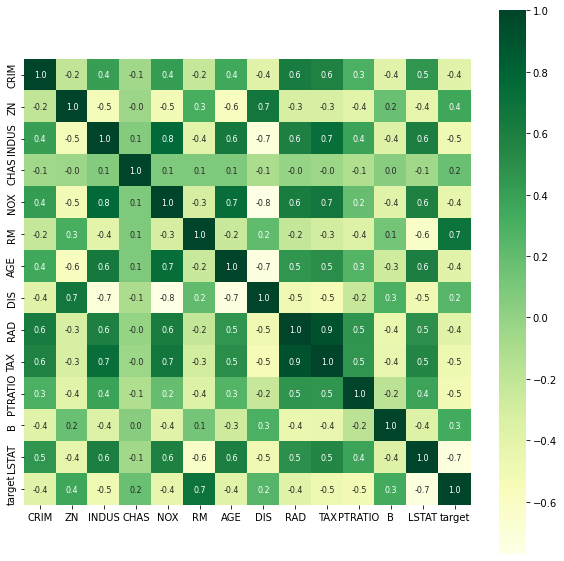

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="YlGn")
# cbar to indicate the correlation
# sqyare to foem squares



In [ ]:
X=data.drop(["target"],axis=1)
Y=data["target"]
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(404, 13)
(102, 13)
(404,)
(102,)


XGBoost Regression this is decision tree  based model

---



In [ ]:
#Now we need to trai our model
model=XGBRFRegressor()
model.fit(xtrain,ytrain)

[17:50:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

EVALUTION 
in clasification we check the acuuracy by the correctly predicted output

but we cannot do that in the regression models we use the "R SQUARED ERROR,MEAN ABOUSOLUTE ERROR"


PREDICTION

In [ ]:
predic=model.predict(xtrain)
print(predic)

[24.26097   23.937279  20.795095  34.678898  17.572048  14.097384
 20.537981  16.403696  12.070563  20.26593   15.364628  10.941337
 26.76523   29.387794  32.45916   20.57872   23.951025  20.601912
 33.815083  20.506857  24.623003  11.109909  40.909138  20.645123
 17.505491  20.504509  20.822424  27.183193  20.645123  33.550327
 20.683706  11.11836   20.674335  16.958675  12.095911  11.256641
 13.076128  20.767534  17.01101   15.447571  24.259064  30.94419
 14.228413  16.311405  17.086775  16.693718  24.510582  16.900564
 40.909138  19.273033  20.724445  31.855907  16.715927  24.28798
 20.58119   23.934807  20.58119   32.236374  27.75429   32.13063
 20.63986   38.83841   14.931303  10.566486  24.012209  11.514686
 23.501461  17.51859   20.683706  40.909138  38.35905   33.749577
 23.96692   32.826275  24.248508  40.396328  15.01451   19.20232
 23.930414  24.012209  33.132637  23.979893  24.291822  19.456394
 40.701645  19.374865  33.48482   33.749577  10.3852215 23.744871
 16.850208  12

In [ ]:
# we will measure thr error
#R-squared error
score=metrics.r2_score(ytrain,predic)
print(score)
#mean absolute error
score1=metrics.mean_absolute_error(ytrain,predic)
print(score1)

0.821063060730745
2.640049894257347


Let us test on testing data

0.8517048643795635
2.8000569960650274


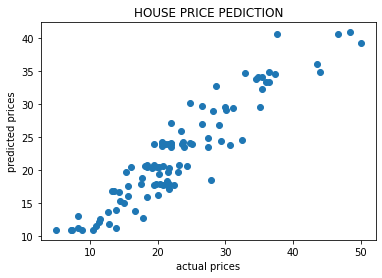

In [ ]:
predic=model.predict(xtest)
#R-squared error
score=metrics.r2_score(ytest,predic)
print(score)
#mean absolute error
score1=metrics.mean_absolute_error(ytest,predic)
print(score1)
plt.scatter(ytest,predic)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("HOUSE PRICE PEDICTION")
plt.show()

the acutal vs predicted


ValueError: ignored

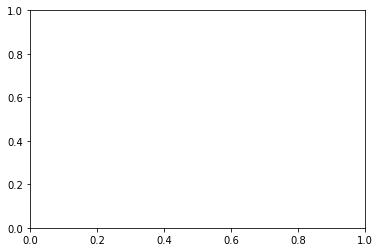

In [ ]:
plt.scatter(ytrain,predic)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("HOUSE PRICE PEDICTION")
plt.show()